# DATA

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving packages.csv to packages.csv


In [ ]:
import pandas as pd

filename = list(uploaded.keys())[0]
data = pd.read_csv(filename)

print(data.head())


   package_id package_name    origin destination  weight     status  \
0           1    Package_1  Surabaya    Surabaya    78.0  Delivered   
1           2    Package_2      Bali    Surabaya    50.0  Delivered   
2           3    Package_3      Bali        Bali    47.0  Delivered   
3           4    Package_4  Surabaya     Jakarta    13.0  Delivered   
4           5    Package_5   Jakarta        Bali    97.0  Delivered   

                category        dispatched_at         delivered_at  damaged  
0  Road Freight Packages  2024-06-12 01:51:00  2024-06-12 01:51:00        1  
1   Air Freight Packages  2024-10-15 15:00:42  2024-10-18 15:00:42        1  
2  Road Freight Packages  2024-07-11 21:15:39  2024-07-11 21:15:39        0  
3  Rail Freight Packages  2024-06-27 05:08:34  2024-07-31 05:08:34        0  
4  Rail Freight Packages  2024-03-22 04:24:42  2024-04-17 04:24:42        0  


In [ ]:
!pip install geopy scikit-learn minisom matplotlib seaborn


  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.3-py3-none-any.whl size=11706 sha256=b704c2fb17c7a7fe6de6e30022b95b5c03095c9437312ab99f6242645b96a8b7
  Stored in directory: /root/.cache/pip/wheels/96/98/a5/52dee3e8ed1dbfc4d77e4da41b6d89dd7ab9ead1b921e766f8
Successfully built minisom


# SUPPORT VECTOR MACHINE

SVM Model Evaluation Report:
              precision    recall  f1-score   support

           0       0.85      0.92      0.88       388
           1       0.82      0.70      0.76       212

    accuracy                           0.84       600
   macro avg       0.83      0.81      0.82       600
weighted avg       0.84      0.84      0.84       600

SVM Model Training Accuracy: 85.42%
SVM Model Testing Accuracy: 84.00%


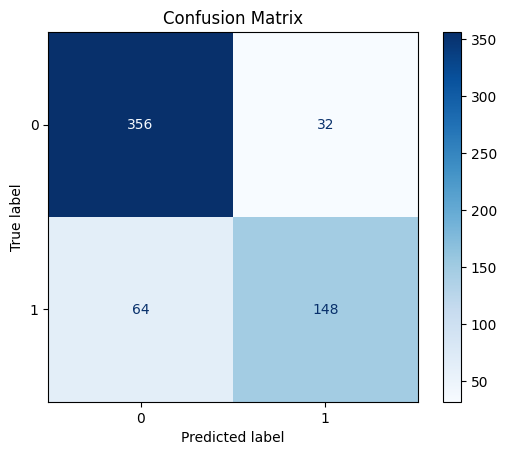

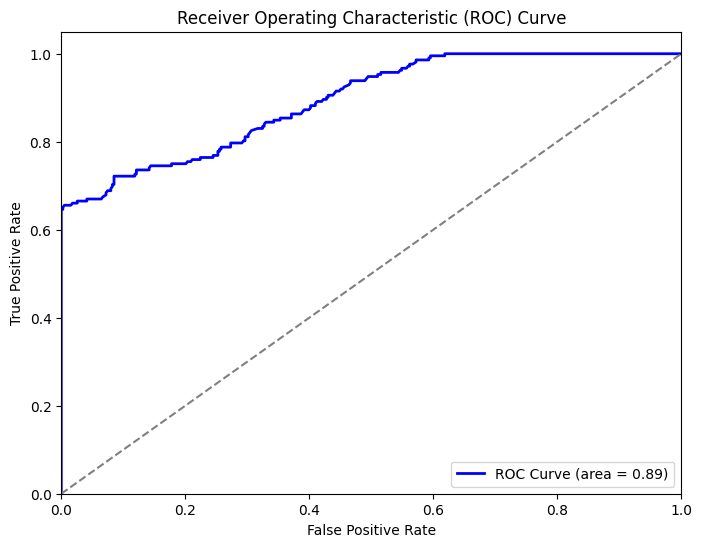

Comparison of Actual vs Predicted:
      weight  category_encoded    distance  Actual  Predicted
2400    18.0                 0  952.810627       0          0
2401    66.0                 2    0.000000       0          0
2402    64.0                 1    0.000000       0          0
2403     4.0                 3    0.000000       1          0
2404    78.0                 0  952.810627       1          1
...      ...               ...         ...     ...        ...
2995    61.0                 0  664.895567       1          1
2996    82.0                 0  664.895567       1          1
2997    40.0                 2  664.895567       0          0
2998    65.0                 1  664.895567       1          0
2999    96.0                 2  296.092173       0          0

[600 rows x 5 columns]
Number of differing entries: 96


In [ ]:
import pandas as pd
from geopy.distance import geodesic
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import matplotlib.pyplot as plt

data = pd.read_csv('regr.csv')

label_encoder = LabelEncoder()
data['origin_encoded'] = label_encoder.fit_transform(data['origin'])
data['destination_encoded'] = label_encoder.fit_transform(data['destination'])
data['category_encoded'] = label_encoder.fit_transform(data['category'])
data['status_encoded'] = label_encoder.fit_transform(data['status'])

coordinates = {
    'Jakarta': (-6.2088, 106.8456),
    'Surabaya': (-7.2504, 112.7688),
    'Bali': (-8.4095, 115.1889),
}

def calculate_distance(row):
    origin_coords = coordinates.get(row['origin'], (0, 0))
    destination_coords = coordinates.get(row['destination'], (0, 0))
    return geodesic(origin_coords, destination_coords).kilometers

data['distance'] = data.apply(calculate_distance, axis=1)

X = data[['weight', 'category_encoded', 'distance']]
y = data['damaged']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_model = SVC(class_weight='balanced', random_state=42)
svm_model.fit(X_train_scaled, y_train)

y_train_pred = svm_model.predict(X_train_scaled)
y_test_pred = svm_model.predict(X_test_scaled)

print("SVM Model Evaluation Report:")
print(classification_report(y_test, y_test_pred, zero_division=1))

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"SVM Model Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"SVM Model Testing Accuracy: {test_accuracy * 100:.2f}%")

cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

fpr, tpr, thresholds = roc_curve(y_test, svm_model.decision_function(X_test_scaled))
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

comparison_df = X_test.copy()
comparison_df['Actual'] = y_test.values
comparison_df['Predicted'] = y_test_pred

print("Comparison of Actual vs Predicted:")
print(comparison_df)

differences = comparison_df[comparison_df['Actual'] != comparison_df['Predicted']]
print(f"Number of differing entries: {len(differences)}")


# RANDOM FOREST KOHANEN

Random Forest Model Evaluation Report:
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       388
           1       0.83      0.72      0.77       212

    accuracy                           0.85       600
   macro avg       0.84      0.82      0.83       600
weighted avg       0.85      0.85      0.85       600

Random Forest Model Training Accuracy: 95.29%
Random Forest Model Testing Accuracy: 84.83%
Comparison of Actual vs Predicted:
      weight  category_encoded  origin_encoded  destination_encoded  \
1801    96.0                 3               2                    1   
1190    16.0                 2               2                    2   
1817    35.0                 3               0                    1   
251     22.0                 0               0                    2   
2505    79.0                 2               0                    1   
...      ...               ...             ...                  ...   
104     98.

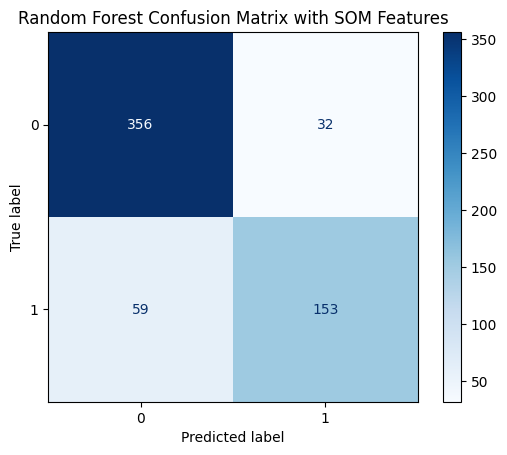

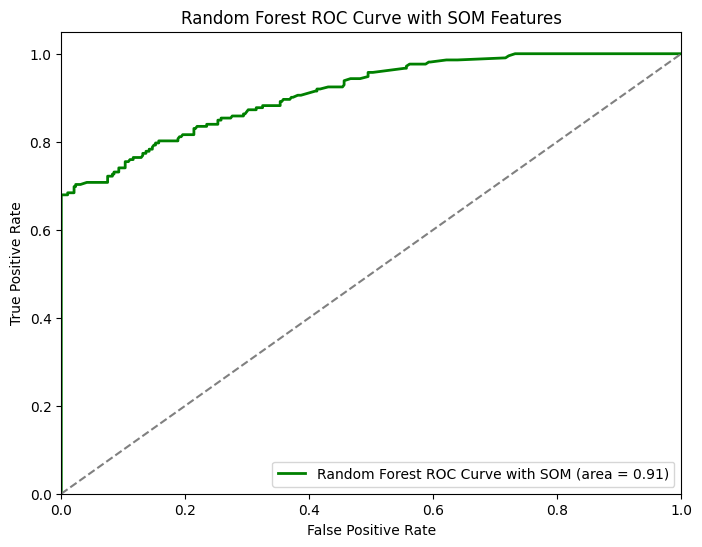

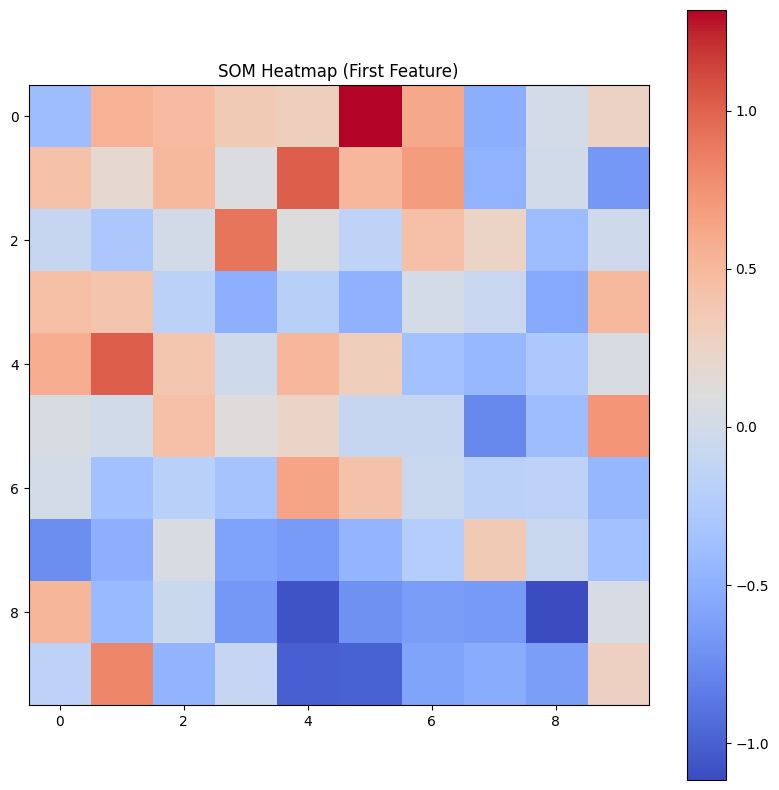

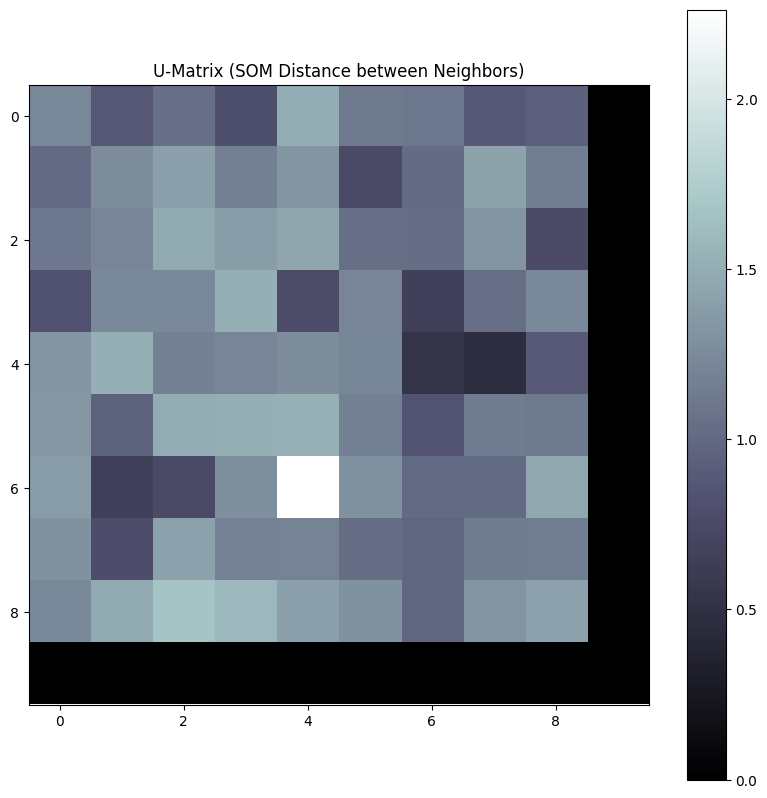

In [ ]:
from geopy.distance import geodesic
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from minisom import MiniSom
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay
import numpy as np

data = pd.read_csv('regr.csv')

label_encoder = LabelEncoder()
data['origin_encoded'] = label_encoder.fit_transform(data['origin'])
data['destination_encoded'] = label_encoder.fit_transform(data['destination'])
data['category_encoded'] = label_encoder.fit_transform(data['category'])
data['status_encoded'] = label_encoder.fit_transform(data['status'])

coordinates = {
    'Jakarta': (-6.2088, 106.8456),
    'Surabaya': (-7.2504, 112.7688),
    'Bali': (-8.4095, 115.1889)
}

def calculate_distance(row):
    origin_coords = coordinates.get(row['origin'], (0, 0))
    destination_coords = coordinates.get(row['destination'], (0, 0))
    return geodesic(origin_coords, destination_coords).kilometers

data['distance'] = data.apply(calculate_distance, axis=1)

X = data[['weight', 'category_encoded', 'origin_encoded', 'destination_encoded', 'distance']]
y = data['damaged']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

som = MiniSom(x=10, y=10, input_len=X_train_scaled.shape[1], sigma=1.0, learning_rate=0.5)
som.train(X_train_scaled, 100)

train_labels = [som.winner(x) for x in X_train_scaled]
test_labels = [som.winner(x) for x in X_test_scaled]

train_clusters = [str(label[0]) + str(label[1]) for label in train_labels]
test_clusters = [str(label[0]) + str(label[1]) for label in test_labels]

X_train['som_cluster'] = train_clusters
X_test['som_cluster'] = test_clusters

X_train['som_cluster'] = LabelEncoder().fit_transform(X_train['som_cluster'])
X_test['som_cluster'] = LabelEncoder().fit_transform(X_test['som_cluster'])

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train[['weight', 'category_encoded', 'origin_encoded', 'destination_encoded', 'distance', 'som_cluster']], y_train)

y_pred_rf = model.predict(X_test[['weight', 'category_encoded', 'origin_encoded', 'destination_encoded', 'distance', 'som_cluster']])

print("Random Forest Model Evaluation Report:")
print(classification_report(y_test, y_pred_rf, zero_division=1))

y_train_pred_rf = model.predict(X_train[['weight', 'category_encoded', 'origin_encoded', 'destination_encoded', 'distance', 'som_cluster']])
accuracy_train_rf = accuracy_score(y_train, y_train_pred_rf)
print(f"Random Forest Model Training Accuracy: {accuracy_train_rf * 100:.2f}%")

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Model Testing Accuracy: {accuracy_rf * 100:.2f}%")

comparison_df = X_test.copy()
comparison_df['Actual'] = y_test.values
comparison_df['Predicted'] = y_pred_rf

print("Comparison of Actual vs Predicted:")
print(comparison_df)

differences = comparison_df[comparison_df['Actual'] != comparison_df['Predicted']]
print(f"Number of differing entries: {len(differences)}")

cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=model.classes_)
disp_rf.plot(cmap=plt.cm.Blues)
plt.title('Random Forest Confusion Matrix with SOM Features')
plt.show()

fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, model.predict_proba(X_test[['weight', 'category_encoded', 'origin_encoded', 'destination_encoded', 'distance', 'som_cluster']])[:, 1])
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'Random Forest ROC Curve with SOM (area = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve with SOM Features')
plt.legend(loc="lower right")
plt.show()

plt.figure(figsize=(10, 10))
plt.imshow(np.array(som.get_weights())[:,:,0], cmap='coolwarm')
plt.colorbar()
plt.title('SOM Heatmap (First Feature)')
plt.show()

u_matrix = np.zeros((som.get_weights().shape[0], som.get_weights().shape[1]))
for i in range(som.get_weights().shape[0] - 1):
    for j in range(som.get_weights().shape[1] - 1):
        diff_h = np.linalg.norm(som.get_weights()[i, j] - som.get_weights()[i + 1, j])
        diff_v = np.linalg.norm(som.get_weights()[i, j] - som.get_weights()[i, j + 1])
        u_matrix[i, j] = (diff_h + diff_v) / 2

plt.figure(figsize=(10, 10))
plt.imshow(u_matrix, cmap='bone')
plt.colorbar()
plt.title('U-Matrix (SOM Distance between Neighbors)')
plt.show()
